## カーネル関数

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

※ 以下の$k( \mathbf{x}_i, \mathbf{x}_j)$はカーネル関数を表す記号  

### 線形カーネル関数
線形カーネル関数は以下の式になる。  
これは、データ$\mathbf{x}_i$とデータ$\mathbf{x}_j$の内積を計算していることと同じである。  
$k( \mathbf{x}_i, \mathbf{x}_j)$は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$が同じ方向を向いていて各要素の値が大きいほど大きくなる。　   
線形カーネルを用いてSVMを解くと、線形の決定境界しかえられない。    
$k( \mathbf{x}_i, \mathbf{x}_j)=\mathbf{x}_i^T \mathbf{x}_j$  
$\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
$\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
$\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
$\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
$d$ : データの次元  
$i,j = 1,2,3,...N$  
$N$: データ数  

### ガウスカーネル関数
非線形カーネルガウスのうち最もよく用いられるのは、ガウスカーネル関数である。  
ガウスカーネル関数は以下の式になる。  
$k( \mathbf{x}_i, \mathbf{x}_j)$は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の差が小さいほど大きくなる。　  
$k( \mathbf{x}_i, \mathbf{x}_j)=exp(-\gamma \|\mathbf{x}_i-\mathbf{x}_j\|^2)$  
$\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
$\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
$d$ : データの次元  
$i,j = 1,2,3,...N$  
$N$: データ数  
$\gamma$:データのまとまり具合(ばらつきの逆)を表すパラメータ

#### 1次元(d=1)のときのガウスカーネル関数を描く
$y = exp(-\gamma(x)^2)$とおく。

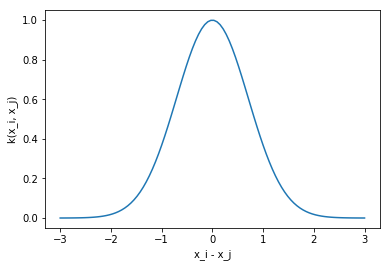

In [7]:
gamma = 1
x = np.linspace(-3,3,100)
y = np.exp(-gamma*np.power(x,2))
plt.plot(x,y)
plt.ylabel("k(x_i, x_j)")
plt.xlabel("x_i - x_j")
plt.show()

- ガウスカーネルは、正規分布になる。パラーメータ$\gamma$は、分布の集まり具合を表す変数である。  
- ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の差が小さいほど値が大きくなる。つまり、y軸は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$のの近さを表す量になっている。

### [演習]
- $\gamma$の値を変えるとグラフはどうなるでしょうか？

## 2次元データに対するカーネル関数の適応
### [演習]
* ここでは、ガウスカーネル関数と線形カーネル関数のそれぞれを適応した場合の違いを確認します。
* データ生成条件は、まずDATA_TYPE=1を選択し、次にDATA_TYPE=2を選択してください。
* ガウスカーネルの$\gamma$の値も変えてみましょう。

In [8]:
DATA_TYPE = 1

if DATA_TYPE==1:
    """
    線形分離可能なデータセット
    """
    X1  = np.array([[  -0.5,  -0.3, -0.3,   -0.1,  -0.1,   0.1,  0.1,  0.3,  0.3],
                               [       0,  -0.6,   0.6,  -1.3,    1.3, -1.9,   1.9, -2.5,  2.5] 
                          ])
    X2  = np.array([[0.5, 0.7, 0.9,  1.0],
                               [    0,     0,    0,     0]
                           ])
    
elif DATA_TYPE==2:
    """
    線形分離不可能なデータセット
    """
    X1  = np.array([[-0.3, -0.3,  0.5,  0.5,   0,  0,  -0.5,      1,   1],
                                [-0.6,  0.6, -1.5,  1.2,  -1,  1,      0, -1.5, 1.5]
                          ])
    X2  = np.array([[0.5, 0.7, 0.9,  1.0],
                              [     0,     0,    0,      0]
                           ])
    
# num_x1 = X1.shape[1]
X = np.hstack((X1,X2))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.5,-0.3,-0.3,-0.1,-0.1,0.1,0.1,0.3,0.3,0.5,0.7,0.9,1.0
1,0.0,-0.6,0.6,-1.3,1.3,-1.9,1.9,-2.5,2.5,0.0,0.0,0.0,0.0


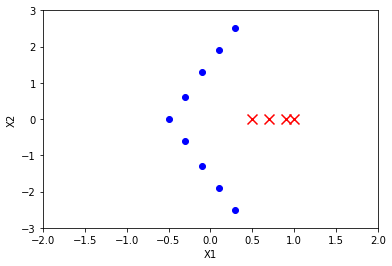

In [9]:
plt.scatter(X1[0],X1[1],marker="o",color="b")
plt.scatter(X2[0],X2[1],marker="x",color="r",s=100)
plt.xlim([-2,2])
plt.ylim([-3,3])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

std = np.std(X, axis=1).copy()
X = (X.T - np.mean(X, axis=1)) / std
X = X.T
X

### 2次元データに対する線形カーネル関数の適応

In [11]:
def k_linear(x, x_):
    """
    線形カーネル関数
    """
    return np.dot(x, x_)
    
N = X.shape[1]
K = np.zeros([N,N])
for i in range(N):
    x = X[:,i]
    for j in range(N):
        x_ = X[:,j]
        k = k_linear(x, x_)
        K[i, j] = k
print(K)

[[ 0.25  0.15  0.15  0.05  0.05 -0.05 -0.05 -0.15 -0.15 -0.25 -0.35 -0.45
  -0.5 ]
 [ 0.15  0.45 -0.27  0.81 -0.75  1.11 -1.17  1.41 -1.59 -0.15 -0.21 -0.27
  -0.3 ]
 [ 0.15 -0.27  0.45 -0.75  0.81 -1.17  1.11 -1.59  1.41 -0.15 -0.21 -0.27
  -0.3 ]
 [ 0.05  0.81 -0.75  1.7  -1.68  2.46 -2.48  3.22 -3.28 -0.05 -0.07 -0.09
  -0.1 ]
 [ 0.05 -0.75  0.81 -1.68  1.7  -2.48  2.46 -3.28  3.22 -0.05 -0.07 -0.09
  -0.1 ]
 [-0.05  1.11 -1.17  2.46 -2.48  3.62 -3.6   4.78 -4.72  0.05  0.07  0.09
   0.1 ]
 [-0.05 -1.17  1.11 -2.48  2.46 -3.6   3.62 -4.72  4.78  0.05  0.07  0.09
   0.1 ]
 [-0.15  1.41 -1.59  3.22 -3.28  4.78 -4.72  6.34 -6.16  0.15  0.21  0.27
   0.3 ]
 [-0.15 -1.59  1.41 -3.28  3.22 -4.72  4.78 -6.16  6.34  0.15  0.21  0.27
   0.3 ]
 [-0.25 -0.15 -0.15 -0.05 -0.05  0.05  0.05  0.15  0.15  0.25  0.35  0.45
   0.5 ]
 [-0.35 -0.21 -0.21 -0.07 -0.07  0.07  0.07  0.21  0.21  0.35  0.49  0.63
   0.7 ]
 [-0.45 -0.27 -0.27 -0.09 -0.09  0.09  0.09  0.27  0.27  0.45  0.63  0.81
   0.9 ]
 [-0

In [12]:
# Kを可視化する
cm = sns.light_palette("green", as_cmap=True)

df = pd.DataFrame(K)
# df -= np.mean(df.as_matrix()) # 標準化
# df /=np.std(df.as_matrix()) # 標準化

df["min"] = np.min(df.as_matrix()) #カラーテーブルを適切に表示させるための列
df["max"] = np.max(df.as_matrix()) #カラーテーブルを適切に表示させるための列
print("グラム行列:")
df.round(3).style.background_gradient(cmap=cm, axis=1)

グラム行列:


,0,1,2,3,4,5,6,7,8,9,10,11,12,min,max
0,0.25,0.15,0.15,0.05,0.05,-0.05,-0.05,-0.15,-0.15,-0.25,-0.35,-0.45,-0.5,-6.16,6.34
1,0.15,0.45,-0.27,0.81,-0.75,1.11,-1.17,1.41,-1.59,-0.15,-0.21,-0.27,-0.3,-6.16,6.34
2,0.15,-0.27,0.45,-0.75,0.81,-1.17,1.11,-1.59,1.41,-0.15,-0.21,-0.27,-0.3,-6.16,6.34
3,0.05,0.81,-0.75,1.7,-1.68,2.46,-2.48,3.22,-3.28,-0.05,-0.07,-0.09,-0.1,-6.16,6.34
4,0.05,-0.75,0.81,-1.68,1.7,-2.48,2.46,-3.28,3.22,-0.05,-0.07,-0.09,-0.1,-6.16,6.34
5,-0.05,1.11,-1.17,2.46,-2.48,3.62,-3.6,4.78,-4.72,0.05,0.07,0.09,0.1,-6.16,6.34
6,-0.05,-1.17,1.11,-2.48,2.46,-3.6,3.62,-4.72,4.78,0.05,0.07,0.09,0.1,-6.16,6.34
7,-0.15,1.41,-1.59,3.22,-3.28,4.78,-4.72,6.34,-6.16,0.15,0.21,0.27,0.3,-6.16,6.34
8,-0.15,-1.59,1.41,-3.28,3.22,-4.72,4.78,-6.16,6.34,0.15,0.21,0.27,0.3,-6.16,6.34
9,-0.25,-0.15,-0.15,-0.05,-0.05,0.05,0.05,0.15,0.15,0.25,0.35,0.45,0.5,-6.16,6.34


* 行および列の番号は、データ点の番号を意味する。0~9は青○ラベルのデータ、10~12は赤×ラベルのデータである。
* 表の値はあるデータ点とあるデータ点の類似度を表している。同じ方向を向いていて要素の値が大きいほど、表の値が大きくなる。

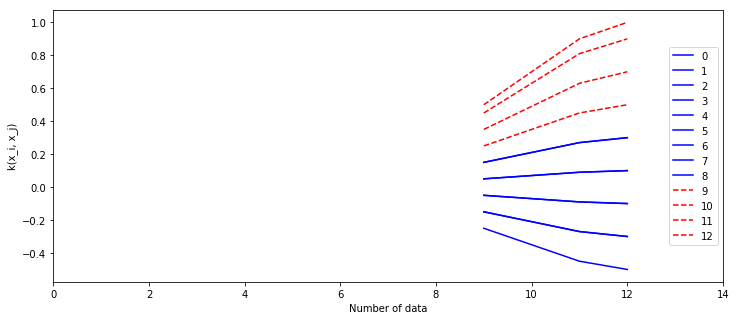

In [13]:
# グラム行列の下から4行だけで折れ線グラフを描く
ax1 = df.iloc[9:,:9].plot(color="b", figsize=(12,5))
df.iloc[9:,9:13].plot(color="r", ax=ax1, ls="--")
plt.ylabel("k(x_i, x_j)")
plt.xlabel("Number of data")
plt.legend(loc="right")
plt.xlim([0,14])
plt.show()

### [DATA_TYPE=1の場合]
* 0~8と9~12が離れている。それぞれの類似度が異なるためである。元のデータの近さ情報をうまく凝縮できていることになる。
  
### [DATA_TYPE=2の場合]
* 0~8と9~12が混じっている。それぞれ同じ程度の類似度になっているためである。

### 2次元データに対するガウスカーネル関数の適応

In [14]:
def k_gauss(x, x_, gamma):
    """
    ガウスカーネル関数
    """
    return np.exp(-gamma*np.power(np.linalg.norm(x - x_), 2))
    
N = X.shape[1]
K = np.zeros([N,N])
for i in range(N):
    x = X[:,i]
    for j in range(N):
        x_ = X[:,j]
        k = k_gauss(x, x_, gamma=1)
        K[i, j] = k
print(K.round(2))

[[1.   0.67 0.67 0.16 0.16 0.02 0.02 0.   0.   0.37 0.24 0.14 0.11]
 [0.67 1.   0.24 0.59 0.03 0.16 0.   0.02 0.   0.37 0.26 0.17 0.13]
 [0.67 0.24 1.   0.03 0.59 0.   0.16 0.   0.02 0.37 0.26 0.17 0.13]
 [0.16 0.59 0.03 1.   0.   0.67 0.   0.2  0.   0.13 0.1  0.07 0.06]
 [0.16 0.03 0.59 0.   1.   0.   0.67 0.   0.2  0.13 0.1  0.07 0.06]
 [0.02 0.16 0.   0.67 0.   1.   0.   0.67 0.   0.02 0.02 0.01 0.01]
 [0.02 0.   0.16 0.   0.67 0.   1.   0.   0.67 0.02 0.02 0.01 0.01]
 [0.   0.02 0.   0.2  0.   0.67 0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.   0.2  0.   0.67 0.   1.   0.   0.   0.   0.  ]
 [0.37 0.37 0.37 0.13 0.13 0.02 0.02 0.   0.   1.   0.96 0.85 0.78]
 [0.24 0.26 0.26 0.1  0.1  0.02 0.02 0.   0.   0.96 1.   0.96 0.91]
 [0.14 0.17 0.17 0.07 0.07 0.01 0.01 0.   0.   0.85 0.96 1.   0.99]
 [0.11 0.13 0.13 0.06 0.06 0.01 0.01 0.   0.   0.78 0.91 0.99 1.  ]]


In [15]:
# Kの可視化
cm = sns.light_palette("green", as_cmap=True)

df = pd.DataFrame(K)
# df -= np.min(df.as_matrix()) #正規化
# df /=np.max(df.as_matrix()) #正規化
df -= np.mean(df.as_matrix()) # 標準化
df /=np.std(df.as_matrix()) # 標準化


df["min"] = np.min(df.as_matrix()) #カラーテーブルを適切に表示させるための列
df["max"] = np.max(df.as_matrix()) #カラーテーブルを適切に表示させるための列
print("グラム行列:")
df.round(3).style.background_gradient(cmap=cm, axis=1)

グラム行列:


,0,1,2,3,4,5,6,7,8,9,10,11,12,min,max
0,2.133,1.181,1.181,-0.301,-0.301,-0.701,-0.701,-0.752,-0.752,0.307,-0.071,-0.348,-0.451,-0.755,2.133
1,1.181,2.133,-0.071,0.945,-0.68,-0.301,-0.75,-0.701,-0.755,0.307,-0.014,-0.278,-0.383,-0.755,2.133
2,1.181,-0.071,2.133,-0.68,0.945,-0.75,-0.301,-0.755,-0.701,0.307,-0.014,-0.278,-0.383,-0.755,2.133
3,-0.301,0.945,-0.68,2.133,-0.752,1.181,-0.755,-0.172,-0.755,-0.383,-0.474,-0.559,-0.596,-0.755,2.133
4,-0.301,-0.68,0.945,-0.752,2.133,-0.755,1.181,-0.755,-0.172,-0.383,-0.474,-0.559,-0.596,-0.755,2.133
5,-0.701,-0.301,-0.75,1.181,-0.755,2.133,-0.755,1.181,-0.755,-0.689,-0.701,-0.714,-0.72,-0.755,2.133
6,-0.701,-0.75,-0.301,-0.755,1.181,-0.755,2.133,-0.755,1.181,-0.689,-0.701,-0.714,-0.72,-0.755,2.133
7,-0.752,-0.701,-0.755,-0.172,-0.755,1.181,-0.755,2.133,-0.755,-0.75,-0.75,-0.751,-0.752,-0.755,2.133
8,-0.752,-0.755,-0.701,-0.755,-0.172,-0.755,1.181,-0.755,2.133,-0.75,-0.75,-0.751,-0.752,-0.755,2.133
9,0.307,0.307,0.307,-0.383,-0.383,-0.689,-0.689,-0.75,-0.75,2.133,2.02,1.706,1.494,-0.755,2.133


* 行および列の番号は、データ点の番号を意味する。0~9は青○ラベルのデータ、10~12は赤×ラベルのデータである。
* 表の値はあるデータ点とあるデータ点の類似度を表している。2つのデータ点のベクトル差のノルムが0に近いほど、表の値が大きくなる。

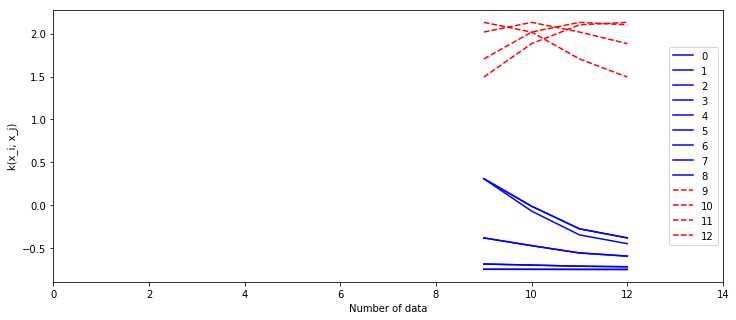

In [16]:
# グラム行列の下から4行だけで折れ線グラフを描く
ax1 = df.iloc[9:,:9].plot(color="b", figsize=(12,5))
df.iloc[9:,9:13].plot(color="r", ax=ax1, ls="--")
plt.ylabel("k(x_i, x_j)")
plt.xlabel("Number of data")
plt.legend(loc="right")
plt.xlim([0,14])
plt.show()

### [DATA_TYPE=1の場合]
* 0~8と9~12が離れている。それぞれの類似度が異なるためである。元のデータの近さ情報をうまく凝縮できていることになる。
  
### [DATA_TYPE=2の場合]
* 0~8と9~12が離れている。それぞれの類似度が異なるためである。元のデータの近さ情報をうまく凝縮できていることになる。